Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2013,5,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-06-12,39322.781250,34864.109375,35555.789062,39097.859375,4.066911e+10,39097.859375
2021-06-13,40978.363281,38757.285156,39016.968750,40218.476562,4.314891e+10,40218.476562
2021-06-14,41295.269531,39609.468750,40427.167969,40406.269531,4.642015e+10,40406.269531


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2462 entries, 2014-09-16 to 2021-06-18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2462 non-null   float64
 1   Low        2462 non-null   float64
 2   Open       2462 non-null   float64
 3   Close      2462 non-null   float64
 4   Volume     2462 non-null   float64
 5   Adj Close  2462 non-null   float64
 6   Spread     2462 non-null   float64
dtypes: float64(7)
memory usage: 153.9 KB


## Plot the closing value of aave over time

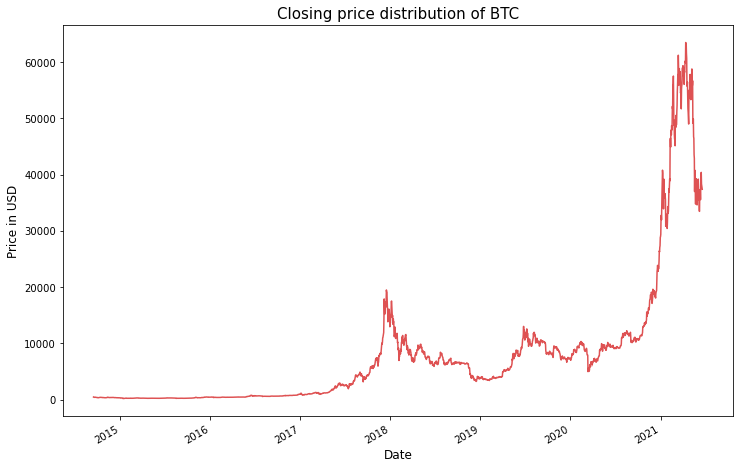

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of BTC", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-06-12,39322.781250,34864.109375,35555.789062,39097.859375,4.066911e+10,39097.859375
2021-06-13,40978.363281,38757.285156,39016.968750,40218.476562,4.314891e+10,40218.476562
2021-06-14,41295.269531,39609.468750,40427.167969,40406.269531,4.642015e+10,40406.269531


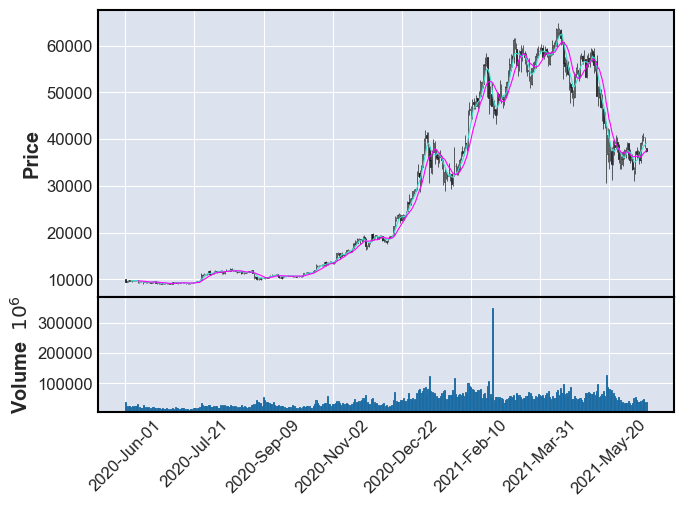

In [6]:
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

In [7]:
#fig = plt.figure(figsize=(12,8))
#ax1 = plt.subplot2grid((1,1), (0,0))

#candlestick_df = aave_df[aave_df['Date']>'2017-05-01']
#ohlc = []
#for ind, row in candlestick_df.iterrows():
#    ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
#    ohlc.append(ol)
    
## candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
#plt.xlabel("Date", fontsize=12)
#plt.ylabel("Price in USD", fontsize=12)
#plt.title("Candlestick chart for Aave", fontsize=15)
#plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
#plt.show()

In [8]:
#aave_df_2 = pd.read_csv('../../resources/prices/coin_Aave.csv', index_col='SNo',parse_dates=['Date'])
#aave_df_2['Date_mpl'] = aave_df_2['Date'].apply(lambda x: mdates.date2num(x))

#fig, ax = plt.subplots(figsize=(12,8))
## sns.lineplot(aave_df_2.Close.values, time=aave_df_2.Date_mpl.values, alpha=0.8, color=color[2], ax=ax)
#ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
#fig.autofmt_xdate()
#plt.xlabel('Date', fontsize=12)
#plt.ylabel('Price in USD', fontsize=12)
#plt.title("Closing price distribution of AAVE", fontsize=15)
#plt.show()

## Future Price Prediction

In [9]:
from fbprophet import Prophet

import data from Yahoo

In [10]:
base_df

,High,Low,Open,Close,Volume,Adj Close,Spread
Date,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015,15.752014
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002,43.755981
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990,43.302979
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992,33.412994
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014,19.244995
...,...,...,...,...,...,...,...
2021-06-12,39322.781250,34864.109375,35555.789062,39097.859375,4.066911e+10,39097.859375,4458.671875
2021-06-13,40978.363281,38757.285156,39016.968750,40218.476562,4.314891e+10,40218.476562,2221.078125
2021-06-14,41295.269531,39609.468750,40427.167969,40406.269531,4.642015e+10,40406.269531,1685.800781


In [11]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
2085,2020-06-02,9656.717773
2086,2020-06-03,9800.636719
2087,2020-06-04,9665.533203
2088,2020-06-05,9653.679688
2089,2020-06-06,9758.852539
...,...,...
2457,2021-06-12,39097.859375
2458,2021-06-13,40218.476562
2459,2021-06-14,40406.269531
2460,2021-06-15,38347.062500


In [12]:
m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
378,2021-06-21,34247.023119,30426.685574,38164.796311
379,2021-06-22,33730.146748,30019.580068,37685.230950
380,2021-06-23,33598.385243,29723.227770,37654.943529
381,2021-06-24,33144.525421,29204.903288,37077.612910
382,2021-06-25,32908.414786,28856.751354,37082.358107


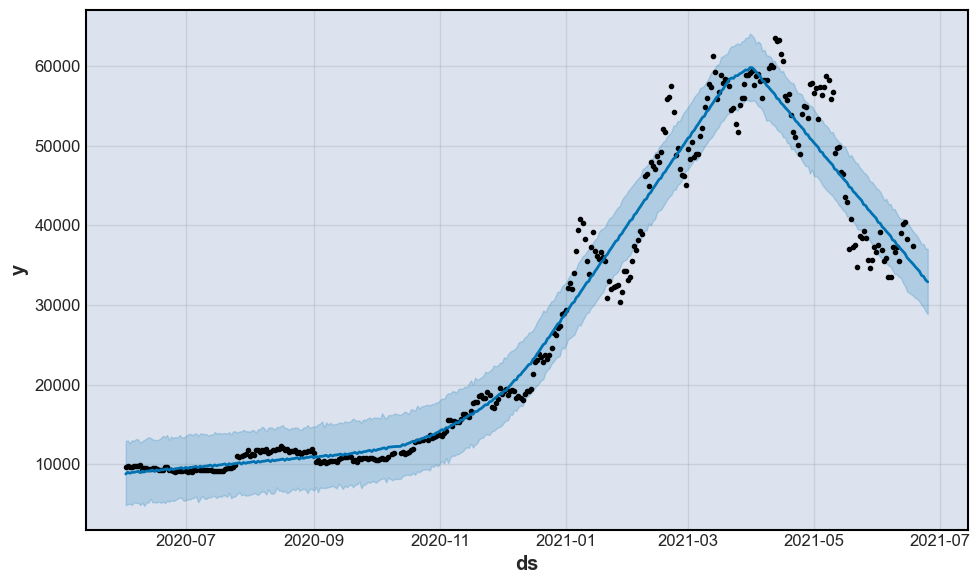

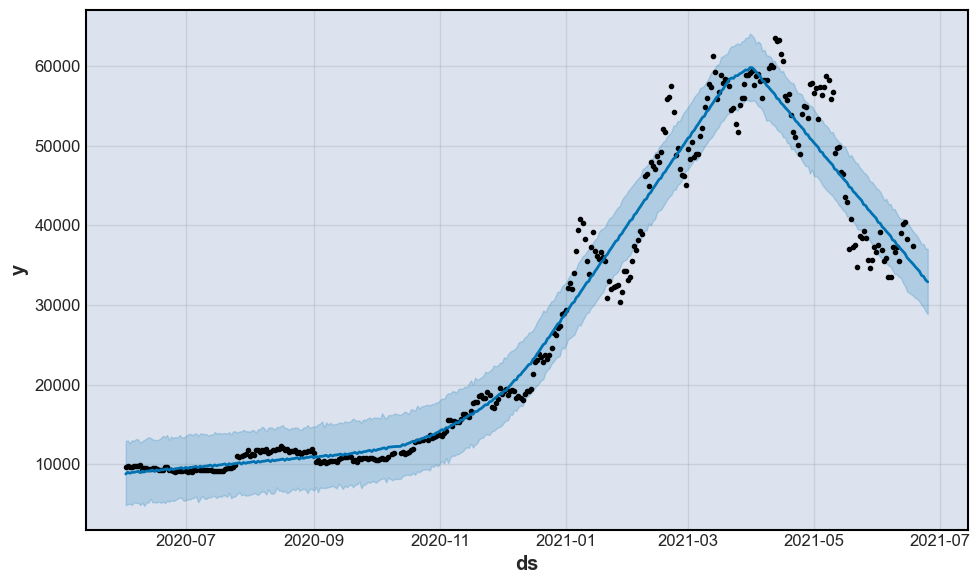

In [13]:
m.plot(forecast)

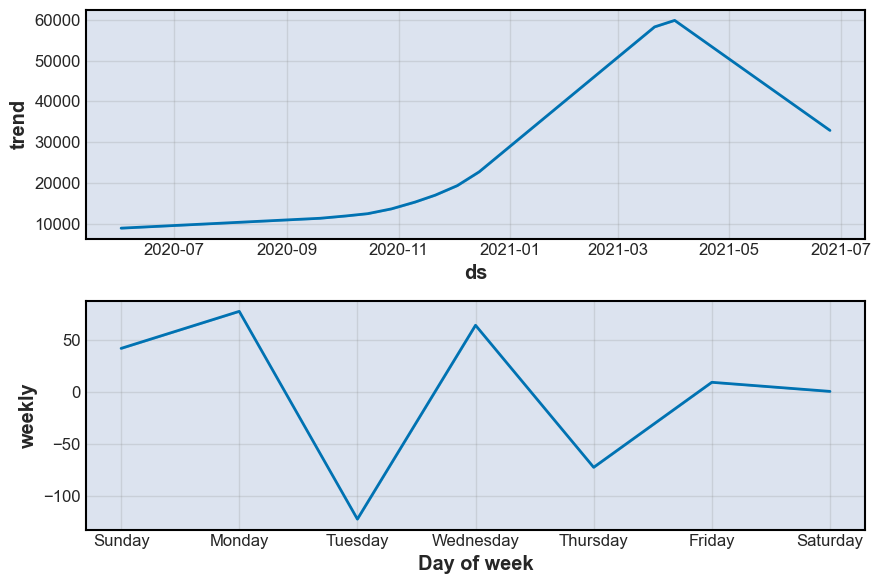

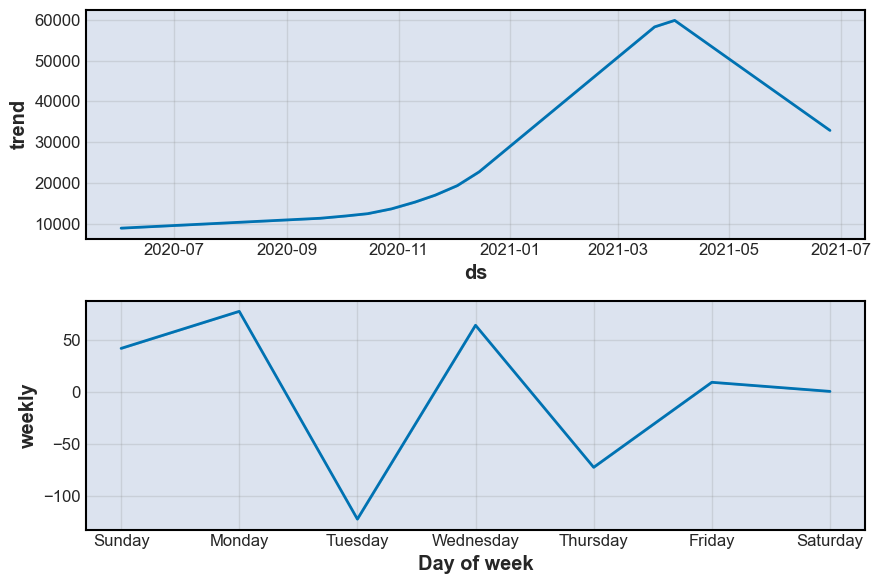

In [14]:
m.plot_components(forecast)